In [2]:
# Classification

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist["data"], mnist["target"]

In [5]:
X.shape

(70000, 784)

In [6]:
X.iloc[0]

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Name: 0, Length: 784, dtype: int64

In [7]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y.shape

(70000,)

In [9]:
y[0]

'5'

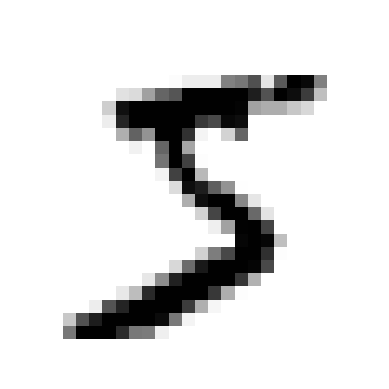

In [10]:
from random import randint
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X.iloc[0]
some_digit_img = some_digit.values.reshape(28, 28)

plt.imshow(some_digit_img, cmap="binary")
plt.axis("off")
plt.show()

In [11]:
import numpy as np

y = y.astype(np.uint8)

In [12]:
# MNIST dataset has already arranged the digits accordingly
X_tr, X_tst, y_tr, y_tst = X[:60000], X[60000:], y[:60000], y[60000:]

In [13]:
y_tr_5 = (y_tr==5)
y_tst_5 = (y_tst==5)

In [14]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_tr, y_tr_5)

sgd_clf.predict([some_digit])

x:\E\Documents\Code\Repo\machine-learning\chp2\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_tr, y_tr_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [16]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [17]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_tr, y_tr_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [18]:
from sklearn.model_selection import cross_val_predict

y_tr_pred = cross_val_predict(sgd_clf, X_tr, y_tr_5, cv=3)

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_tr_5, y_tr_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [20]:
y_tr_perfect_pred = y_tr_5
confusion_matrix(y_tr_5, y_tr_perfect_pred)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_tr_5, y_tr_pred)

0.8370879772350012

In [22]:
recall_score(y_tr_5, y_tr_pred)

0.6511713705958311

In [23]:
f1_score(y_tr_5, y_tr_pred)

0.7325171197343847

In [24]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

x:\E\Documents\Code\Repo\machine-learning\chp2\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [25]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [26]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [27]:
y_scores = cross_val_predict(sgd_clf, X_tr, y_tr_5, cv=3, method="decision_function")

In [28]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_tr_5, y_scores)

In [29]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    [...] # highlight the threshold and add the legend, axis label and grid

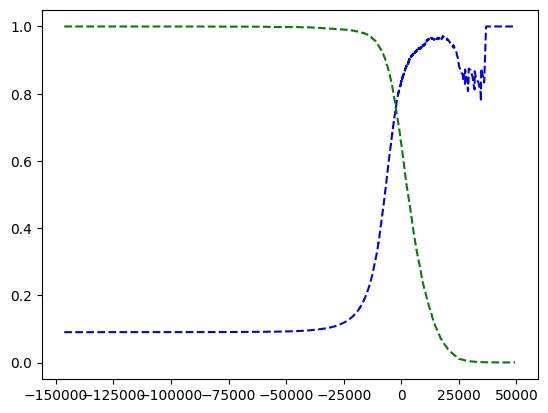

In [30]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [31]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [32]:
y_tr_pred_90 = (y_scores >= threshold_90_precision)

In [33]:
precision_score(y_tr_5, y_tr_pred_90)

0.9000345901072293

In [34]:
recall_score(y_tr_5, y_tr_pred_90)

0.4799852425751706

In [35]:
from sklearn.metrics import roc_curve

# fpr = false positive rate
# tpr = true positive rate i.e. recall
fpr, tpr, thresholds = roc_curve(y_tr_5, y_scores)

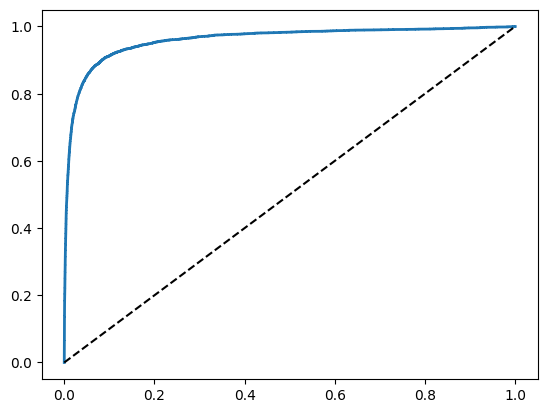

In [36]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    [...] # Add axis labels and grid

# A good classifier stays away as far as possible from the central diagonal line
# The area under the curve (AUC) of a perfect classifier will be 1  
plot_roc_curve(fpr, tpr)
plt.show()

In [37]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_tr_5, y_scores)

0.9604938554008616

In [38]:
# As a rule of thumb for binary classification, refer to Precision-Recall curve when the positive class is rare/false positive is considered better than getting false negative (recall over precision)
# Else, use the ROC curve

In [39]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_tr, y_tr_5, cv=3, method="predict_proba")

In [40]:
y_scores_forest = y_probas_forest[:, 1] # get only the proba of positive class

In [41]:
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [42]:
y_scores_forest

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])

In [43]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_tr_5, y_scores_forest)

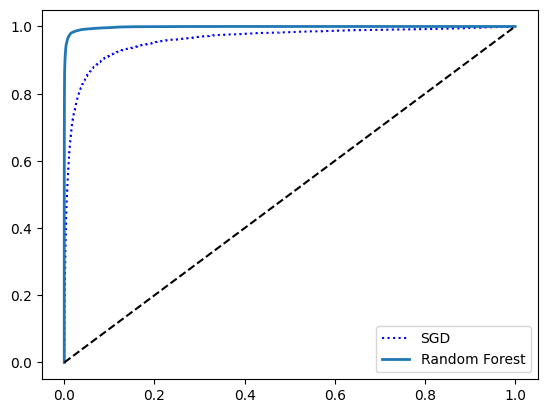

In [44]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [45]:
roc_auc_score(y_tr_5, y_scores_forest)

0.9983436731328145

In [46]:
# scikit auto detects the use of binary classifier to classify multinominal classes and implements either OVR (one versus the rest) or OVO (one versus one)
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_tr, y_tr)
svm_clf.predict([some_digit])

x:\E\Documents\Code\Repo\machine-learning\chp2\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [47]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores
#  we can see that the highest score is given to the number predicted by the svm

x:\E\Documents\Code\Repo\machine-learning\chp2\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [48]:
# np.argmax returns the highest score, which is corresponding to number 5
# under the hood, np.argmax returns the index of the highest value along an axis
np.argmax(some_digit_scores)

5

In [49]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [50]:
svm_clf.classes_[5]

5

In [51]:
# to force SVM to use OVR instantiate a new OneVsRestClassifier
from sklearn.multiclass import OneVsRestClassifier

svm_ovr = OneVsRestClassifier(SVC())
svm_ovr.fit(X_tr, y_tr)
svm_ovr.predict([some_digit])

x:\E\Documents\Code\Repo\machine-learning\chp2\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
x:\E\Documents\Code\Repo\machine-learning\chp2\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
x:\E\Documents\Code\Repo\machine-learning\chp2\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
x:\E\Documents\Code\Repo\machine-learning\chp2\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
x:\E\Documents\Code\Repo\machine-learning\chp2\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
x:\E\Documents\Code\

array([5], dtype=uint8)

In [52]:
len(svm_ovr.estimators_)

10

In [53]:
new_sgd = SGDClassifier()
new_sgd.fit(X_tr, y_tr)
new_sgd.predict([some_digit])

x:\E\Documents\Code\Repo\machine-learning\chp2\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [54]:
new_sgd.decision_function([some_digit])
# in this case, sgd is wrong, and being very confident about it too

x:\E\Documents\Code\Repo\machine-learning\chp2\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-10079.19908233, -36871.24650898,  -9244.1618265 ,
          2448.28000672, -17709.89941015,   3895.32697795,
        -22513.23884912, -12161.64085063, -12004.20928541,
         -7477.43889281]])

In [55]:
cross_val_score(new_sgd, X_tr, y_tr, cv=3, scoring="accuracy")

array([0.8653 , 0.8585 , 0.88125])

In [56]:
sgd_ovr = OneVsRestClassifier(SGDClassifier())
sgd_ovr.fit(X_tr, y_tr)
sgd_ovr.predict([some_digit])

x:\E\Documents\Code\Repo\machine-learning\chp2\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
x:\E\Documents\Code\Repo\machine-learning\chp2\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
x:\E\Documents\Code\Repo\machine-learning\chp2\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
x:\E\Documents\Code\Repo\machine-learning\chp2\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
x:\E\Documents\Code\Repo\machine-learning\chp2\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with f

array([5], dtype=uint8)

In [57]:
sgd_ovr.decision_function([some_digit])

x:\E\Documents\Code\Repo\machine-learning\chp2\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
x:\E\Documents\Code\Repo\machine-learning\chp2\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
x:\E\Documents\Code\Repo\machine-learning\chp2\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
x:\E\Documents\Code\Repo\machine-learning\chp2\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
x:\E\Documents\Code\Repo\machine-learning\chp2\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with f

array([[-17542.80994672, -25574.29365231,  -5963.27700804,
            41.42271324, -22459.27442595,   1814.52468745,
        -24035.54664052, -14737.678885  ,  -6804.21683754,
        -11192.45930231]])

In [58]:
cross_val_score(sgd_ovr,X_tr, y_tr, cv=3, scoring="accuracy")

array([0.86165, 0.8904 , 0.89195])

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_tr.astype(np.float64))
cross_val_score(new_sgd, X_tr_scaled, y_tr, cv=3, scoring="accuracy")

array([0.8998, 0.8898, 0.9068])

In [60]:
y_tr_pred = cross_val_predict(new_sgd, X_tr_scaled, y_tr, cv=3)
conf_mx = confusion_matrix(y_tr, y_tr_pred)
conf_mx

x:\E\Documents\Code\Repo\machine-learning\chp2\venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
x:\E\Documents\Code\Repo\machine-learning\chp2\venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([[5597,    0,   24,    8,    9,   48,   37,    6,  193,    1],
       [   0, 6415,   38,   24,    5,   44,    4,    8,  191,   13],
       [  27,   30, 5266,   93,   73,   27,   65,   40,  326,   11],
       [  23,   18,  121, 5266,    2,  215,   27,   40,  345,   74],
       [  12,   14,   51,   12, 5220,   11,   36,   25,  288,  173],
       [  31,   16,   32,  173,   53, 4487,   77,   15,  469,   68],
       [  30,   17,   47,    2,   44,   97, 5558,    4,  118,    1],
       [  20,   10,   54,   31,   51,   12,    3, 5723,  151,  210],
       [  19,   66,   47,   94,    4,  132,   27,   11, 5402,   49],
       [  25,   18,   30,   67,  120,   35,    1,  183,  313, 5157]],
      dtype=int64)

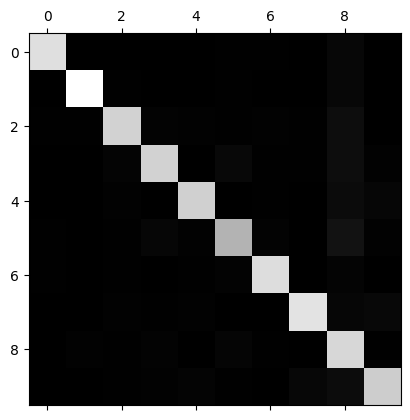

In [61]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()
# lighter colour represents hit count

In [62]:
# lets divide the errors by the number of instances per classes, to remove the possible bias caused by abundance in the training set
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

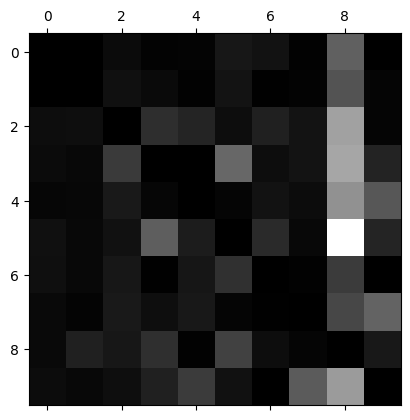

In [63]:
np.fill_diagonal(norm_conf_mx, 0) # just remove the diagonal line to only see the errors
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

# from the plot we can see that a lot of numbers are wrongly classified as 8 (based on the column)
# but 8 itself is generally classified correctly

In [64]:
# let's see what our classifier is actually doing under the hood

# cl_a, cl_b = 3, 5
# X_aa = X_tr[(y_tr==cl_a) & (y_tr_pred == cl_a)]
# X_ab = X_tr[(y_tr==cl_a) & (y_tr_pred == cl_b)]
# X_ba = X_tr[(y_tr==cl_b) & (y_tr_pred == cl_a)]
# X_bb = X_tr[(y_tr==cl_b) & (y_tr_pred == cl_b)]

# plt.figure(figsize=(8,8))
# plt.subplot(221); plot_digits(X_aa[:25], im)

In [65]:
from sklearn.neighbors import KNeighborsClassifier

y_tr_lg = (y_tr >= 7)
y_tr_odd = (y_tr %2 == 1)
y_multilabel = np.c_[y_tr_lg, y_tr_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_tr, y_multilabel)

KNeighborsClassifier()